# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_df = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
full_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_mice= full_df["Mouse ID"].nunique
number_mice

<bound method IndexOpsMixin.nunique of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup= full_df.loc[full_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup


array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_df[full_df['Mouse ID'].isin(mice_dup)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice=clean_df["Mouse ID"].nunique()
clean_number_mice

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [6]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg= clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_agg
                                                                         
                                                                       

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

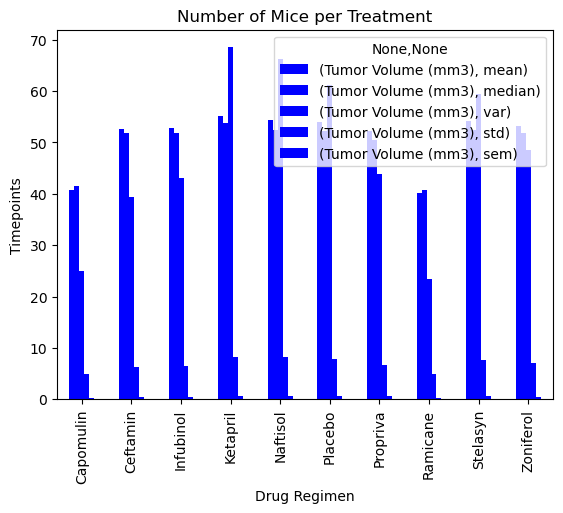

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = sum_agg.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Number of Mice per Treatment")

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


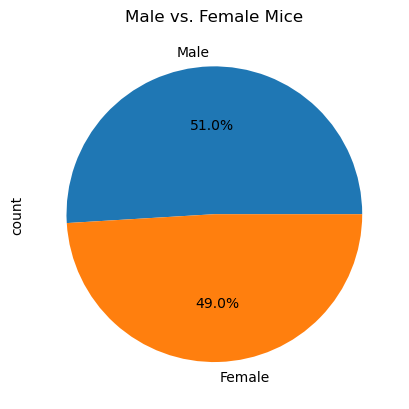

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Male vs. Female Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


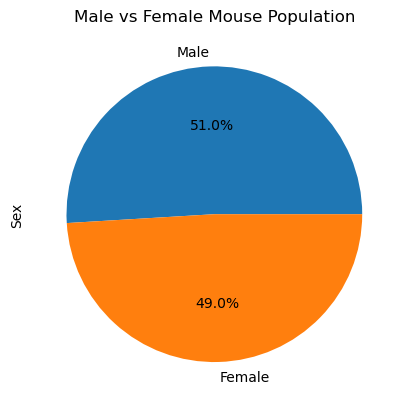

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

#redo

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
# Start by getting the last (greatest) timepoint for each mouse
    greatest_timepoint_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_df,on=['Mouse ID','Timepoint'], how='left')
max_timepoint_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

tumor_volume_data = {'Capomulin':[],
                     'Ramicane':[],
                     'Infubinol':[],
                     'Ceftamin':[]}





# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names:
    # Add subset
    subset = max_timepoint_df[max_timepoint_df['Drug Regimen']== name]
    

    # Loop thru regiments highest timepoint data
for i in max_timepoint_df.index:
        # Append the tumor volume to the list
        if max_timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_volume_data[name].append(max_timepoint_df.iloc[i]['Tumor Volume (mm3)'])
          
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
first_quartile = quartiles[0.25]
second_quartile = quartiles[0.5]
third_quartile = quartiles[0.75]
iqr = third_quartile - first_quartile
lower_bound = first_quartile - (1.5*iqr)
upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
outliers = max_timepoint_df.loc[(max_timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (max_timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)



    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  


{'whiskers': [<matplotlib.lines.Line2D at 0x12d8f2c90>,
 'caps': [<matplotlib.lines.Line2D at 0x12d8e3710>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d693210>],
 'medians': [<matplotlib.lines.Line2D at 0x12d900f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d739e10>],
 'means': []}

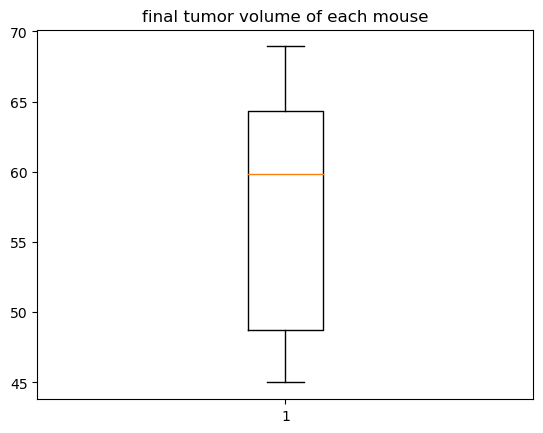

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('final tumor volume of each mouse')
ax3.boxplot(subset['Tumor Volume (mm3)'], flierprops=box_plot)

## Line and Scatter Plots

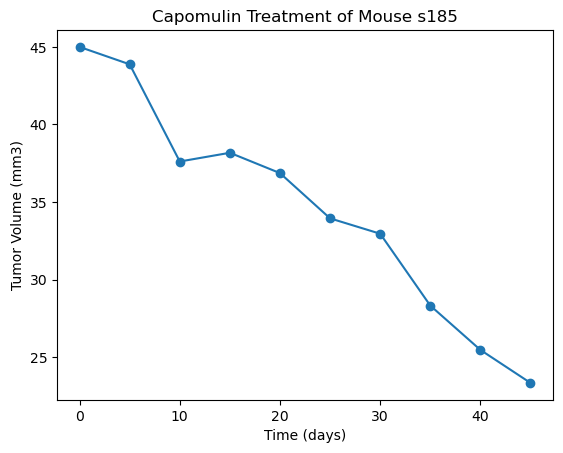

In [49]:



#generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mice_treatment['Timepoint'], mice_treatment['Tumor Volume (mm3)'], marker = 'o')


# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

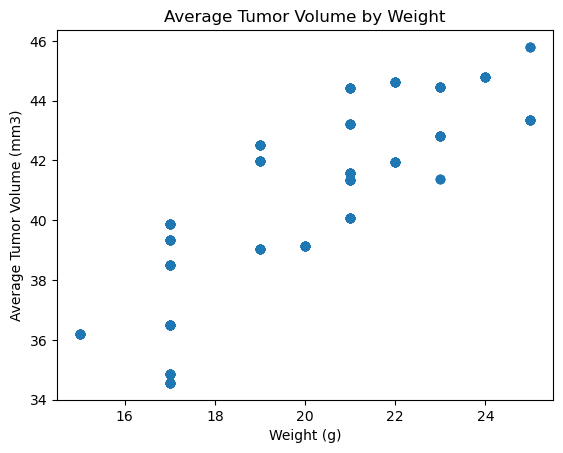

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']



avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']]
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()




## Correlation and Regression

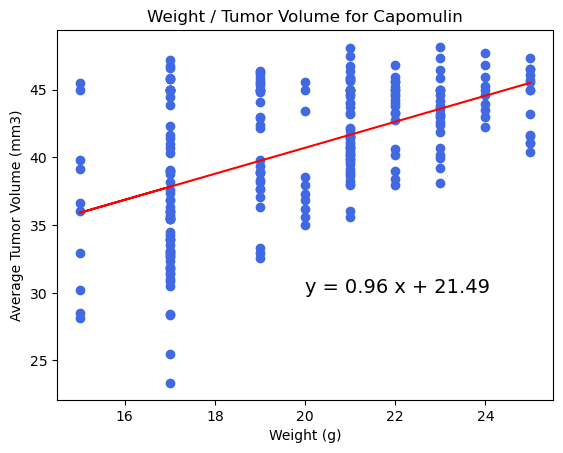

In [75]:
# Calculate the correlation coefficient and a linear regression model 

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_vol_df["Weight (g)"],avg_vol_df["Tumor Volume (mm3)"])
regress_values=avg_vol_df["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_vol_df["Weight (g)"],avg_vol_df["Tumor Volume (mm3)"],color='royalblue')

plt.plot(avg_vol_df["Weight (g)"], regress_values, color='red')

plt.annotate(line_eq,(20,30), fontsize=14)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight / Tumor Volume for Capomulin")
plt.show()